# Previsão de variavel usando regressão linear

## Importação de pacotes

In [17]:
import pandas as pd
#from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme(color_codes=True)

## Ler multiplas abas do excel e fazer o bind rows

In [18]:
def read_excel_sheets(xls_path):
    """Read all sheets of an Excel workbook and return a single DataFrame"""
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = pd.DataFrame()
    columns = None
    for idx, name in enumerate(xl.sheet_names):
        print(f'Reading sheet #{idx}: {name}')
        sheet = xl.parse(name)
        if idx == 0:
            # Save column names from the first sheet to match for append
            columns = sheet.columns
        sheet.columns = columns
        # Assume index of existing data frame when appended
        df = df.append(sheet, ignore_index=True)
    return df

In [19]:
df = read_excel_sheets('PREVISAO_VARIAVEL.xlsx')

Loading PREVISAO_VARIAVEL.xlsx into pandas
Reading sheet #0: TIME1
Reading sheet #1: TIME2
Reading sheet #2: TIME3
Reading sheet #3: TIME4
Reading sheet #4: TIME5
Reading sheet #5: TIME6
Reading sheet #6: TIME7


## Investigar os dados

In [20]:
df.tail(1)

,08/2021,X,VARIAVEL1,ANO,TIME,variavel2,01,02,03,04,...,22,23,24,25,26,27,28,29,30,31
634,TOTAL,NaN,NaN,NaN,NaN,306113.0,4395.0,7011.0,16193.0,12099.0,...,4369.0,20783.0,16930.0,13833.0,12177.0,5352.0,5627.0,3155.0,6529.0,NaN


In [21]:
df.columns

Index(['08/2021', 'X', 'VARIAVEL1', 'ANO', 'TIME', 'variavel2', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31'],
      dtype='object')

In [22]:
df.shape

(635, 37)

## Subseting dados

In [23]:
equipe = ['FT REG1','VNA REG1','REG1 FT REG1','REG1 MT REG1','REG1 MTX REG1','REG1 U3 REG1','REG1 U2 REG1']

In [25]:
df = df[df.TIME.isin(equipe)]

## Transformar os dados (pivot wide to longer)

In [27]:
df = df.loc[:,'01':'31'] #Returns a new dataframe with columns a,b and c

In [28]:
df.tail()

,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
498,NaN,435.0,265.0,97.0,165.0,253.0,476.0,336.0,NaN,336.0,...,NaN,372.0,NaN,433.0,370.0,119.0,342.0,NaN,NaN,NaN
499,567.0,NaN,478.0,NaN,NaN,947.0,311.0,NaN,321.0,259.0,...,NaN,492.0,NaN,661.0,173.0,268.0,NaN,NaN,580.0,NaN
500,NaN,384.0,192.0,207.0,177.0,466.0,NaN,353.0,147.0,167.0,...,NaN,587.0,156.0,70.0,193.0,177.0,179.0,NaN,377.0,NaN
501,NaN,NaN,NaN,607.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,829.0,269.0,357.0,154.0,151.0,NaN,442.0,NaN,NaN
502,NaN,512.0,NaN,457.0,NaN,649.0,NaN,NaN,563.0,NaN,...,NaN,594.0,NaN,650.0,NaN,NaN,480.0,NaN,NaN,NaN


In [29]:
df = df.unstack().reset_index()

In [30]:
df.tail()

,level_0,level_1,0
8024,31,498,NaN
8025,31,499,NaN
8026,31,500,NaN
8027,31,501,NaN
8028,31,502,NaN


In [31]:
df.columns = [['DIA','idx','VARIAVEL2']]

In [33]:
df['VARIAVEL2'].isna().sum()

VARIAVEL2    4137
dtype: int64

In [34]:
df['DIA'].isna().sum()

DIA    0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df['VARIAVEL2'].isna().sum()

VARIAVEL2    0
dtype: int64

## Renomear as colunas

In [37]:
df = df[['DIA','VARIAVEL2']]

In [38]:
df.head(10)

,DIA,VARIAVEL2
7,01,377.0
30,01,130.0
31,01,705.0
34,01,286.0
35,01,518.0
39,01,459.0
40,01,334.0
43,01,231.0
44,01,182.0
45,01,198.0


## Histograma Variavel de interesse

<AxesSubplot:ylabel='Count'>

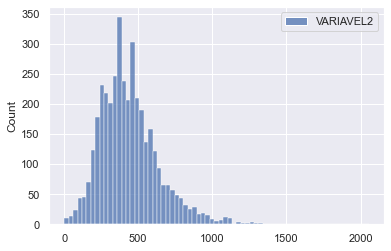

In [40]:
sns.histplot(data=df)

In [41]:
df.describe().round()

,VARIAVEL2
count,3892.0
mean,441.0
std,203.0
min,1.0
25%,302.0
50%,413.0
75%,538.0
max,2055.0


## Group by por dia 

In [42]:
df.columns = ['DIA', 'VARIAVEL2']

In [43]:
df = df.groupby(['DIA']).sum()

In [44]:
df.tail()

,VARIAVEL2
DIA,
26,69465.0
27,66149.0
28,40775.0
29,20572.0
30,65647.0


## Cumsum 

In [45]:
df = df.cumsum()

In [46]:
df = df.reset_index()

In [47]:
df.dtypes

DIA           object
VARIAVEL2    float64
dtype: object

In [48]:
df.head()

,DIA,VARIAVEL2
0,01,23499.0
1,02,86017.0
2,03,153241.0
3,04,216211.0
4,05,292895.0


## Drop last row by selecting all rows except last row

In [49]:
df = df.iloc[:-10 , :]

In [50]:
df = df[['DIA','VARIAVEL2']]

In [51]:
df.tail()

,DIA,VARIAVEL2
15,16,893954.0
16,17,967609.0
17,18,1037756.0
18,19,1109084.0
19,20,1177015.0


## Mudar o tipo de dados

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DIA        20 non-null     object 
 1   VARIAVEL2  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [54]:
df = df.astype({"DIA": int, "VARIAVEL2": int})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   DIA        20 non-null     int32
 1   VARIAVEL2  20 non-null     int32
dtypes: int32(2)
memory usage: 288.0 bytes


## Criação do modelo

In [56]:
x = df[['DIA']].to_numpy()
y = df[['VARIAVEL2']].to_numpy()

In [57]:
model = LinearRegression()

In [58]:
model.fit(x, y)

LinearRegression()

In [59]:
model = LinearRegression().fit(x, y)

## Avaliação do modelo

In [60]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination: 0.9972606066631106
intercept: [-21094.88947368]
slope:  [[58988.48947368]]


In [61]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[  37893.6       ]
 [  96882.08947368]
 [ 155870.57894737]
 [ 214859.06842105]
 [ 273847.55789474]
 [ 332836.04736842]
 [ 391824.53684211]
 [ 450813.02631579]
 [ 509801.51578947]
 [ 568790.00526316]
 [ 627778.49473684]
 [ 686766.98421053]
 [ 745755.47368421]
 [ 804743.96315789]
 [ 863732.45263158]
 [ 922720.94210526]
 [ 981709.43157895]
 [1040697.92105263]
 [1099686.41052632]
 [1158674.9       ]]


## Visualizando o modelo de regressão linear

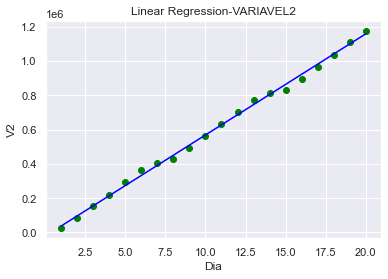

In [63]:
plt.scatter(x,y,color='green')
plt.plot(x, model.predict(x),color='blue')
plt.title('Linear Regression-VARIAVEL2')
plt.xlabel('Dia')
plt.ylabel('V2')
plt.grid(True)
plt.xticks()
plt.yticks()
plt.show()


## Check residuals

<AxesSubplot:xlabel='DIA', ylabel='VARIAVEL2'>

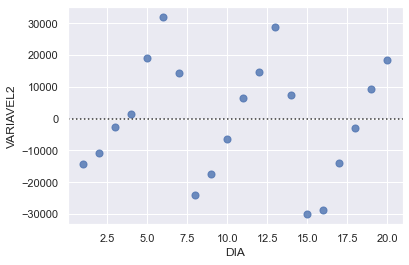

In [64]:
sns.residplot(x="DIA", y="VARIAVEL2", data=df,
           order=0, scatter_kws={"s": 50})

## Fazer Previsão com novos dados

In [65]:
x_new = np.arange(21,32).reshape((-1, 1))

In [66]:
print(x_new)

[[21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]


In [67]:
x_new.shape

(11, 1)

In [68]:
y_new = model.predict(x_new)
print(y_new.round(2))

[[1217663.39]
 [1276651.88]
 [1335640.37]
 [1394628.86]
 [1453617.35]
 [1512605.84]
 [1571594.33]
 [1630582.82]
 [1689571.31]
 [1748559.79]
 [1807548.28]]


In [69]:
y_upper = y_new + (y_new*0.05)
y_lower = y_new - (y_new*0.05)

print(y_lower.round(2))
print(y_new)
print(y_upper.round(2))

[[1156780.22]
 [1212819.28]
 [1268858.35]
 [1324897.42]
 [1380936.48]
 [1436975.54]
 [1493014.61]
 [1549053.68]
 [1605092.74]
 [1661131.81]
 [1717170.87]]
[[1217663.38947368]
 [1276651.87894737]
 [1335640.36842105]
 [1394628.85789474]
 [1453617.34736842]
 [1512605.83684211]
 [1571594.32631579]
 [1630582.81578947]
 [1689571.30526316]
 [1748559.79473684]
 [1807548.28421053]]
[[1278546.56]
 [1340484.47]
 [1402422.39]
 [1464360.3 ]
 [1526298.21]
 [1588236.13]
 [1650174.04]
 [1712111.96]
 [1774049.87]
 [1835987.78]
 [1897925.7 ]]


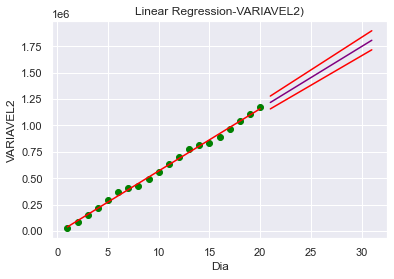

In [70]:
#Visualising the pollynomial regression model results
X = x
plt.scatter(X,y,color='green')
plt.plot(X,model.predict(X),color='red')
plt.title('Linear Regression-VARIAVEL2)')
plt.xlabel('Dia')
plt.ylabel('VARIAVEL2')
plt.grid(True)
plt.plot(x_new,y_upper,color='red')
plt.plot(x_new,y_lower,color='red')
#plt.fill_between(x_new, y_lower, y_upper, edgecolor='g', facecolor='g', alpha=0.3)
plt.plot(x_new,model.predict(x_new),color='purple')
plt.show()

In [72]:
VAR2_PREV = float(y_upper[-1:])
VAR2_target = float(y_new[-1:])

In [74]:
print("A previsão de VAR2 mensal será de {}".format(VAR2_PREV))

A previsão de VAR2 mensal será de 1897925.6984210527
